   ### Building Basic predictive models over the NYC Taxi Trip dataset 


<img src="https://www.brickunderground.com/sites/default/files/styles/new_blog_entry_primary_image_xl/public/blog/images/4859177053_c3fb190917_o.webp" >

## Importing libraries ##


In [126]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopy.distance
import warnings
from datetime import timedelta
import datetime as dt
warnings.filterwarnings('ignore')


## Import data ##

In [127]:
data = pd.read_csv('nyc_taxi_trip_duration.csv')

In [128]:
#A raw data copy

datacp = data

### STRUCTURE OF DATA AND CONTENT ##

In [129]:
data.shape

(729322, 11)

**we can see that there are 729322 rows and 11 columns**



## Data collection ##



The variables present are listed as follows :


 - **id** - a unique identifier for each trip
 - **vendor_id** - a code indicating the provider associated with the trip record
 - **pickup_datetime** - date and time when the meter was engaged
 - **dropoff_datetime** - date and time when the meter was disengaged
 - **passenger_count** - the number of passengers in the vehicle (driver entered value)
 - **pickup_longitude** - the longitude where the meter was engaged
 - **pickup_latitude** - the latitude where the meter was engaged
 - **dropoff_longitude** - the longitude where the meter was disengaged
 - **dropoff_latitude** - the latitude where the meter was disengaged
 - **store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)
 - **trip_duration** - (target) duration of the trip in seconds

 
 
 It is to be noted that the dropoff_datetime and store_and_fwd_flag are not present at the start of the journey 

**Checking the columns for what all variables are present and it can be confirmed that we have all the variables  as mentioned in the project**

In [130]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [131]:
# a view of datatypes that are present
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [132]:
# sample of first 5 rows to understand how values are represented
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [133]:
# sample of first 5 rows to understand how values are represented
data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


#### REFORMATTING FEATURES AND CHECKING CONSISTENCY ####

#### Checking for missing values

In [134]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [135]:

data.shape

(729322, 11)

#### Analysing each variable datatypes

In [136]:
# INTEGER DATATYPE

data.dtypes[data.dtypes == 'int64']

vendor_id          int64
passenger_count    int64
trip_duration      int64
dtype: object

**observations:**

**vendor_id** are the provider identification thus it is considered categorical

**passenger_count** can be take as categorical for better analysis

**trip_duration** are numbers hence they are also fall in integer category

In [137]:
# FLOAT DATATYPE
data.dtypes[data.dtypes == 'float64']

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
dtype: object

**observations:**

**pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude** are suited to in float datatype

In [138]:
# OBJECT DATATYPE
data.dtypes[data.dtypes == 'object']

id                    object
pickup_datetime       object
dropoff_datetime      object
store_and_fwd_flag    object
dtype: object

**Observations:**

**id** is a unique variable with numerical parts and id written at front and I choose to treat it as an object itself

**pickup_datetime and dropoff_datetime** are datetime variable

**store_and_fwd_flag** can be grouped under categorical

In [139]:
# typecasting store_and_fwd_flag to category
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('category')

In [140]:
# Convert into datetime DATA TYPE from strings
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [141]:
#function to find the distance traversed
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return geopy.distance.distance(pickup, drop).km

In [142]:
#adding distance column in the dataframe
data['distance'] = data.apply(lambda x: calc_distance(x), axis = 1)

In [143]:
#calculating the data and imputing the speed into the dataframe
data['speed'] = (data.distance/(data.trip_duration/3600))

In [144]:
#Using datetime to find and create new columns - day_name , month, day_num, pickup_hour

data['day_name'] = data.pickup_datetime.dt.day_name()
data['month'] = data.pickup_datetime.dt.month
data['day_num'] = data.pickup_datetime.dt.weekday
data['pickup_hour'] = data.pickup_datetime.dt.hour

In [145]:
#typecasting month, day_num, pickup_hour to category
data['month'] = data['month'].astype('category')
data['day_num'] = data['day_num'].astype('category')
data['pickup_hour'] = data['pickup_hour'].astype('category')

In [146]:
#the variable datatypes are analysed
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
distance                     float64
speed                        float64
day_name                      object
month                       category
day_num                     category
pickup_hour                 category
dtype: object

In [147]:
# potential passenger_count outlier
data = data[(data['passenger_count']  <= 6) & (data['passenger_count'] > 0)]

In [148]:
#all the categorical variable are converted to numerical

dummy = pd.get_dummies(data.store_and_fwd_flag, prefix='flag')
data = pd.concat([data,dummy], axis = 1)

dummy = pd.get_dummies(data.vendor_id, prefix='vendor_id')
data = pd.concat([data,dummy], axis = 1)

dummy = pd.get_dummies(data.month, prefix='month')
data = pd.concat([data,dummy], axis = 1)

dummy = pd.get_dummies(data.day_num, prefix='day_num')
data = pd.concat([data,dummy], axis = 1)

dummy = pd.get_dummies(data.pickup_hour, prefix='pickup_hour')
data = pd.concat([data,dummy], axis = 1)

dummy = pd.get_dummies(data.passenger_count, prefix='passenger_count')
data = pd.concat([data,dummy], axis = 1)


In [149]:
pd.set_option('display.max_columns', None)


In [150]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,speed,day_name,month,day_num,pickup_hour,flag_N,flag_Y,vendor_id_1,vendor_id_2,month_1,month_2,month_3,month_4,month_5,month_6,day_num_0,day_num_1,day_num_2,day_num_3,day_num_4,day_num_5,day_num_6,pickup_hour_0,pickup_hour_1,pickup_hour_2,pickup_hour_3,pickup_hour_4,pickup_hour_5,pickup_hour_6,pickup_hour_7,pickup_hour_8,pickup_hour_9,pickup_hour_10,pickup_hour_11,pickup_hour_12,pickup_hour_13,pickup_hour_14,pickup_hour_15,pickup_hour_16,pickup_hour_17,pickup_hour_18,pickup_hour_19,pickup_hour_20,pickup_hour_21,pickup_hour_22,pickup_hour_23,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,1.199770,10.797929,Monday,2,0,16,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,4.123945,13.496548,Friday,3,4,23,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,7.250436,15.964262,Sunday,2,6,17,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,2.358287,7.440694,Tuesday,1,1,9,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,4.328155,18.374244,Wednesday,2,2,6,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [151]:
data = data.drop(['id'], axis=1)

In [152]:
data = data.drop(['store_and_fwd_flag'], axis=1)

In [153]:
data = data.drop(['vendor_id'], axis=1)

In [154]:
# data cleaning
# remove potential distance outlier   
data = data[(data['distance'] < data['distance'].quantile(0.95))& (data['distance'] > data['distance'].quantile(0.05))]
   
# remove potential  trip duration outlier   
# trip duration should less then 0.5 day and > 10 sec normally
# in case test data has no trip duration 
data = data[(data['trip_duration']  < 3*3600) & (data['trip_duration'] > 10)]
data = data[(data['trip_duration'] < data['trip_duration'].quantile(0.95))& (data['trip_duration'] > data['trip_duration'].quantile(0.05))]
  


In [155]:
data = data.drop(['dropoff_datetime'], axis=1)

In [156]:
data = data.drop(['pickup_datetime'], axis=1)

In [157]:
data = data.drop(['passenger_count'], axis=1)

In [158]:
data = data.drop(['day_name'], axis=1)

### Selection of evaluation metric and Simple model

#### Shuffling and Creating Train and Test Set

In [159]:
from sklearn.utils import shuffle

# Shuffling the Dataset
datacp = shuffle(datacp, random_state = 30)

#creating 4 divisions
div = int(datacp.shape[0]/4)

# 3 parts to train set and 1 part to test set
train = datacp.loc[:3*div+1,:]
test = datacp.loc[3*div+1:]

## Calculation mean of trip duration ##

In [161]:
# storing simple mean in a new column in the test set as "simple_mean"
test['mean_absolute_error'] = train['trip_duration'].mean()

#calculating mean absolute error
from sklearn.metrics import mean_absolute_error as MAE

mean_error = MAE(test['trip_duration'] , test['mean_absolute_error'])
mean_error

618.3573402453671

**The best metric is selected as mean absolute error as mostof the outliers in the data are removed. since the variable of distance and speed are related to time duration a mean squared or root mean squared errror calculation is felt not required**

## LINEAR REGRESSION WITH REGULARIZATION ##

In [162]:
#seperating independent and dependent variables
x2 = data.drop(['trip_duration'], axis=1)
y2 = data['trip_duration']
x2.shape, y2.shape

((589827, 56), (589827,))

In [163]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x2,test_x2,train_y2,test_y2 = train_test_split(x2,y2, random_state = 66)

In [164]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [165]:
# Creating instance of Linear Regresssion
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x2, train_y2)

LinearRegression(normalize=True)

In [166]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x2)
k = mae(train_predict, train_y2)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 106.27091878687524


In [167]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x2)
k = mae(test_predict, test_y2)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     106.26274185016649


In [168]:
# Importing ridge from sklearn's linear_model module
from sklearn.linear_model import Ridge

In [169]:
#Importing ridge with built-in cross validation
from sklearn.linear_model import RidgeCV

In [170]:
# Create ridge regression with alpha values
regr_cv = RidgeCV(alphas=[0.1, 0.05, 1.0, 10.0])

In [171]:
# fitting into ridge_cv
model_cv = regr_cv.fit(x2, y2)


In [172]:
#finding best alpha value
model_cv.alpha_

1.0

In [173]:
#selecting alpha = 1 for ridge regression
rr = Ridge(alpha=1)

In [174]:
#fits the model on the training set
rr.fit(train_x2, train_y2) 

Ridge(alpha=1)

In [175]:
#predicts on the training set
pred_train_rr= rr.predict(train_x2)
linear_mae_train = mae(train_y2,pred_train_rr)
linear_mae_train 

106.27035973054876

In [176]:
Linear_train = 1 -(linear_mae_train /mean_error)
Linear_train

0.8281408615795194

In [177]:
#prints prediction on the test set

pred_test_rr= rr.predict(test_x2)
linear_mae_test = mae(test_y2,pred_test_rr)
linear_mae_test

106.26160010436662

In [178]:
Linear_test = 1 -(linear_mae_test /mean_error)
Linear_test

0.828155027540869

## DECISION TREE MODEL ##

In [179]:
#Analysing the columns
data.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'trip_duration', 'distance', 'speed', 'month',
       'day_num', 'pickup_hour', 'flag_N', 'flag_Y', 'vendor_id_1',
       'vendor_id_2', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'day_num_0', 'day_num_1', 'day_num_2', 'day_num_3',
       'day_num_4', 'day_num_5', 'day_num_6', 'pickup_hour_0', 'pickup_hour_1',
       'pickup_hour_2', 'pickup_hour_3', 'pickup_hour_4', 'pickup_hour_5',
       'pickup_hour_6', 'pickup_hour_7', 'pickup_hour_8', 'pickup_hour_9',
       'pickup_hour_10', 'pickup_hour_11', 'pickup_hour_12', 'pickup_hour_13',
       'pickup_hour_14', 'pickup_hour_15', 'pickup_hour_16', 'pickup_hour_17',
       'pickup_hour_18', 'pickup_hour_19', 'pickup_hour_20', 'pickup_hour_21',
       'pickup_hour_22', 'pickup_hour_23', 'passenger_count_1',
       'passenger_count_2', 'passenger_count_3', 'passenger_count_4',
       'passenger_count_5', 'passenger_coun

In [180]:
# shuffling the dataset
from sklearn.utils import shuffle
data = shuffle(data, random_state = 42)

In [181]:
#seperating independent and dependent variables(target and the features)

x1 = data.drop(['trip_duration'], axis = 1)
y1 = data['trip_duration']

In [182]:
#load library for dividing data
from sklearn.model_selection import train_test_split

In [183]:
#creating the train and test set
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, random_state = 101, test_size=0.20)

In [184]:
#creating the train and validation set
x11_train, x1_valid, y11_train, y1_valid = train_test_split(x1_train, y1_train, random_state = 101, test_size=0.20)

In [185]:
# import decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [186]:
#creating the decision tree function
dt_model = DecisionTreeRegressor(random_state=10)

In [187]:
#checking the training score
dt_model.fit(x11_train, y11_train)

DecisionTreeRegressor(random_state=10)

In [188]:
#checking the training score
dt_model.score(x11_train, y11_train)

1.0

In [189]:
#checking the validation score
dt_model.score(x1_valid, y1_valid)

0.999814832780106

**We can notice that both train and validation set have good score and a deeper study is needed to check whether there was overfitting and interpret how the different properties influence the tree**

**First we try to interpret accuracy relative to max depth**

In [190]:
#Function to iterate over different max depth and find train and validation score
train_accuracy = []
validation_accuracy = []
for depth in range(1,15):
    dt_model = DecisionTreeRegressor(max_depth=depth,min_impurity_split= 1000, random_state=10)
    dt_model.fit(x11_train, y11_train)
    train_accuracy.append(dt_model.score(x11_train, y11_train))
    validation_accuracy.append(dt_model.score(x1_valid, y1_valid))

In [191]:
#collecting the data into a dataframe
frame = pd.DataFrame({'max_depth':range(1,15), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.348427,0.347822
1,2,0.498316,0.496411
2,3,0.703810,0.701247
3,4,0.820469,0.819176
4,5,0.899602,0.898004


No handles with labels found to put in legend.


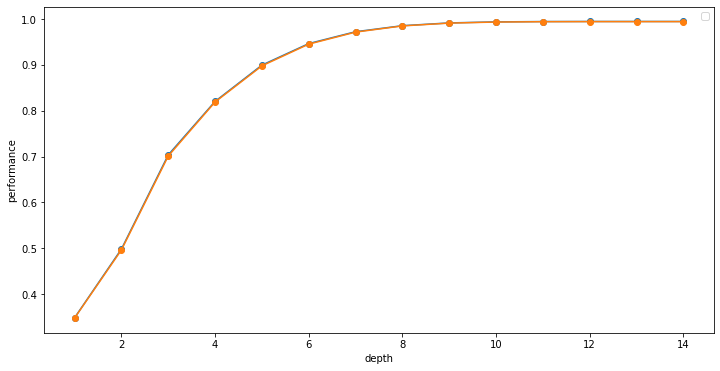

In [192]:
#plotting the maxdepth relative to model score
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('depth')
plt.ylabel('performance')
plt.legend()

**The best max depth is at 9 further it becomes constant but overfitting could be the reason with further increase**

In [193]:
#Function to iterate over different max features and find train and validation score
train_accuracy = []
validation_accuracy = []
for features in range(1,35):
    dt_model = DecisionTreeRegressor(max_depth=9,max_features= features,min_samples_leaf=1000, random_state=10)
    dt_model.fit(x11_train, y11_train)
    train_accuracy.append(dt_model.score(x11_train, y11_train))
    validation_accuracy.append(dt_model.score(x1_valid, y1_valid))

In [194]:
#collecting the data into a dataframe
frame = pd.DataFrame({'max_features':range(1,35), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_features,train_acc,valid_acc
0,1,0.050259,0.050633
1,2,0.187519,0.182010
2,3,0.478110,0.476384
3,4,0.496173,0.493601
4,5,0.513718,0.511726


No handles with labels found to put in legend.


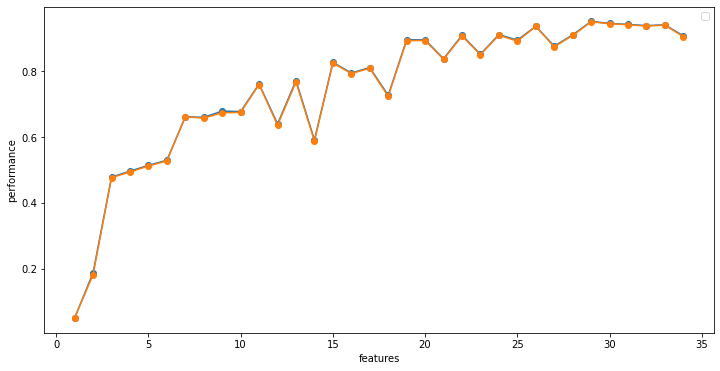

In [195]:
#plotting the maxfeatures relative to model score
plt.figure(figsize=(12,6))
plt.plot(frame['max_features'], frame['train_acc'], marker='o')
plt.plot(frame['max_features'], frame['valid_acc'], marker='o')
plt.xlabel('features')
plt.ylabel('performance')
plt.legend()

**The best number of features is 31 and sample leaf is set to 1000 which is reasonable with the amount of data about 600000**

In [196]:
DecisionTreeRegressor(max_depth=9, max_features=31,min_samples_leaf=1000, random_state=10)

DecisionTreeRegressor(max_depth=9, max_features=31, min_samples_leaf=1000,
                      random_state=10)

In [197]:
#fitting the model
dt_model.fit(x11_train, y11_train)

DecisionTreeRegressor(max_depth=9, max_features=34, min_samples_leaf=1000,
                      random_state=10)

In [198]:
#Training score
decision_train = dt_model.score(x11_train, y11_train)
decision_train

0.9070085341905335

In [199]:
#Validation score
dt_model.score(x1_valid, y1_valid)

0.9046970545011119

**Finally to see whether the model performs well on test data and didnt not overfit**

In [200]:
decision_test = dt_model.score(x1_test,y1_test)
decision_test

0.9056323128792467

**A GOOD TEST SCORE IS OBTAINED**

**STEPS TO DRAW A DECISION TREE**

In [201]:
from sklearn import tree

In [202]:
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=x1_train.columns,max_depth=2,filled=True)


In [203]:
!dot -Tpng tree.dot -o tree.png

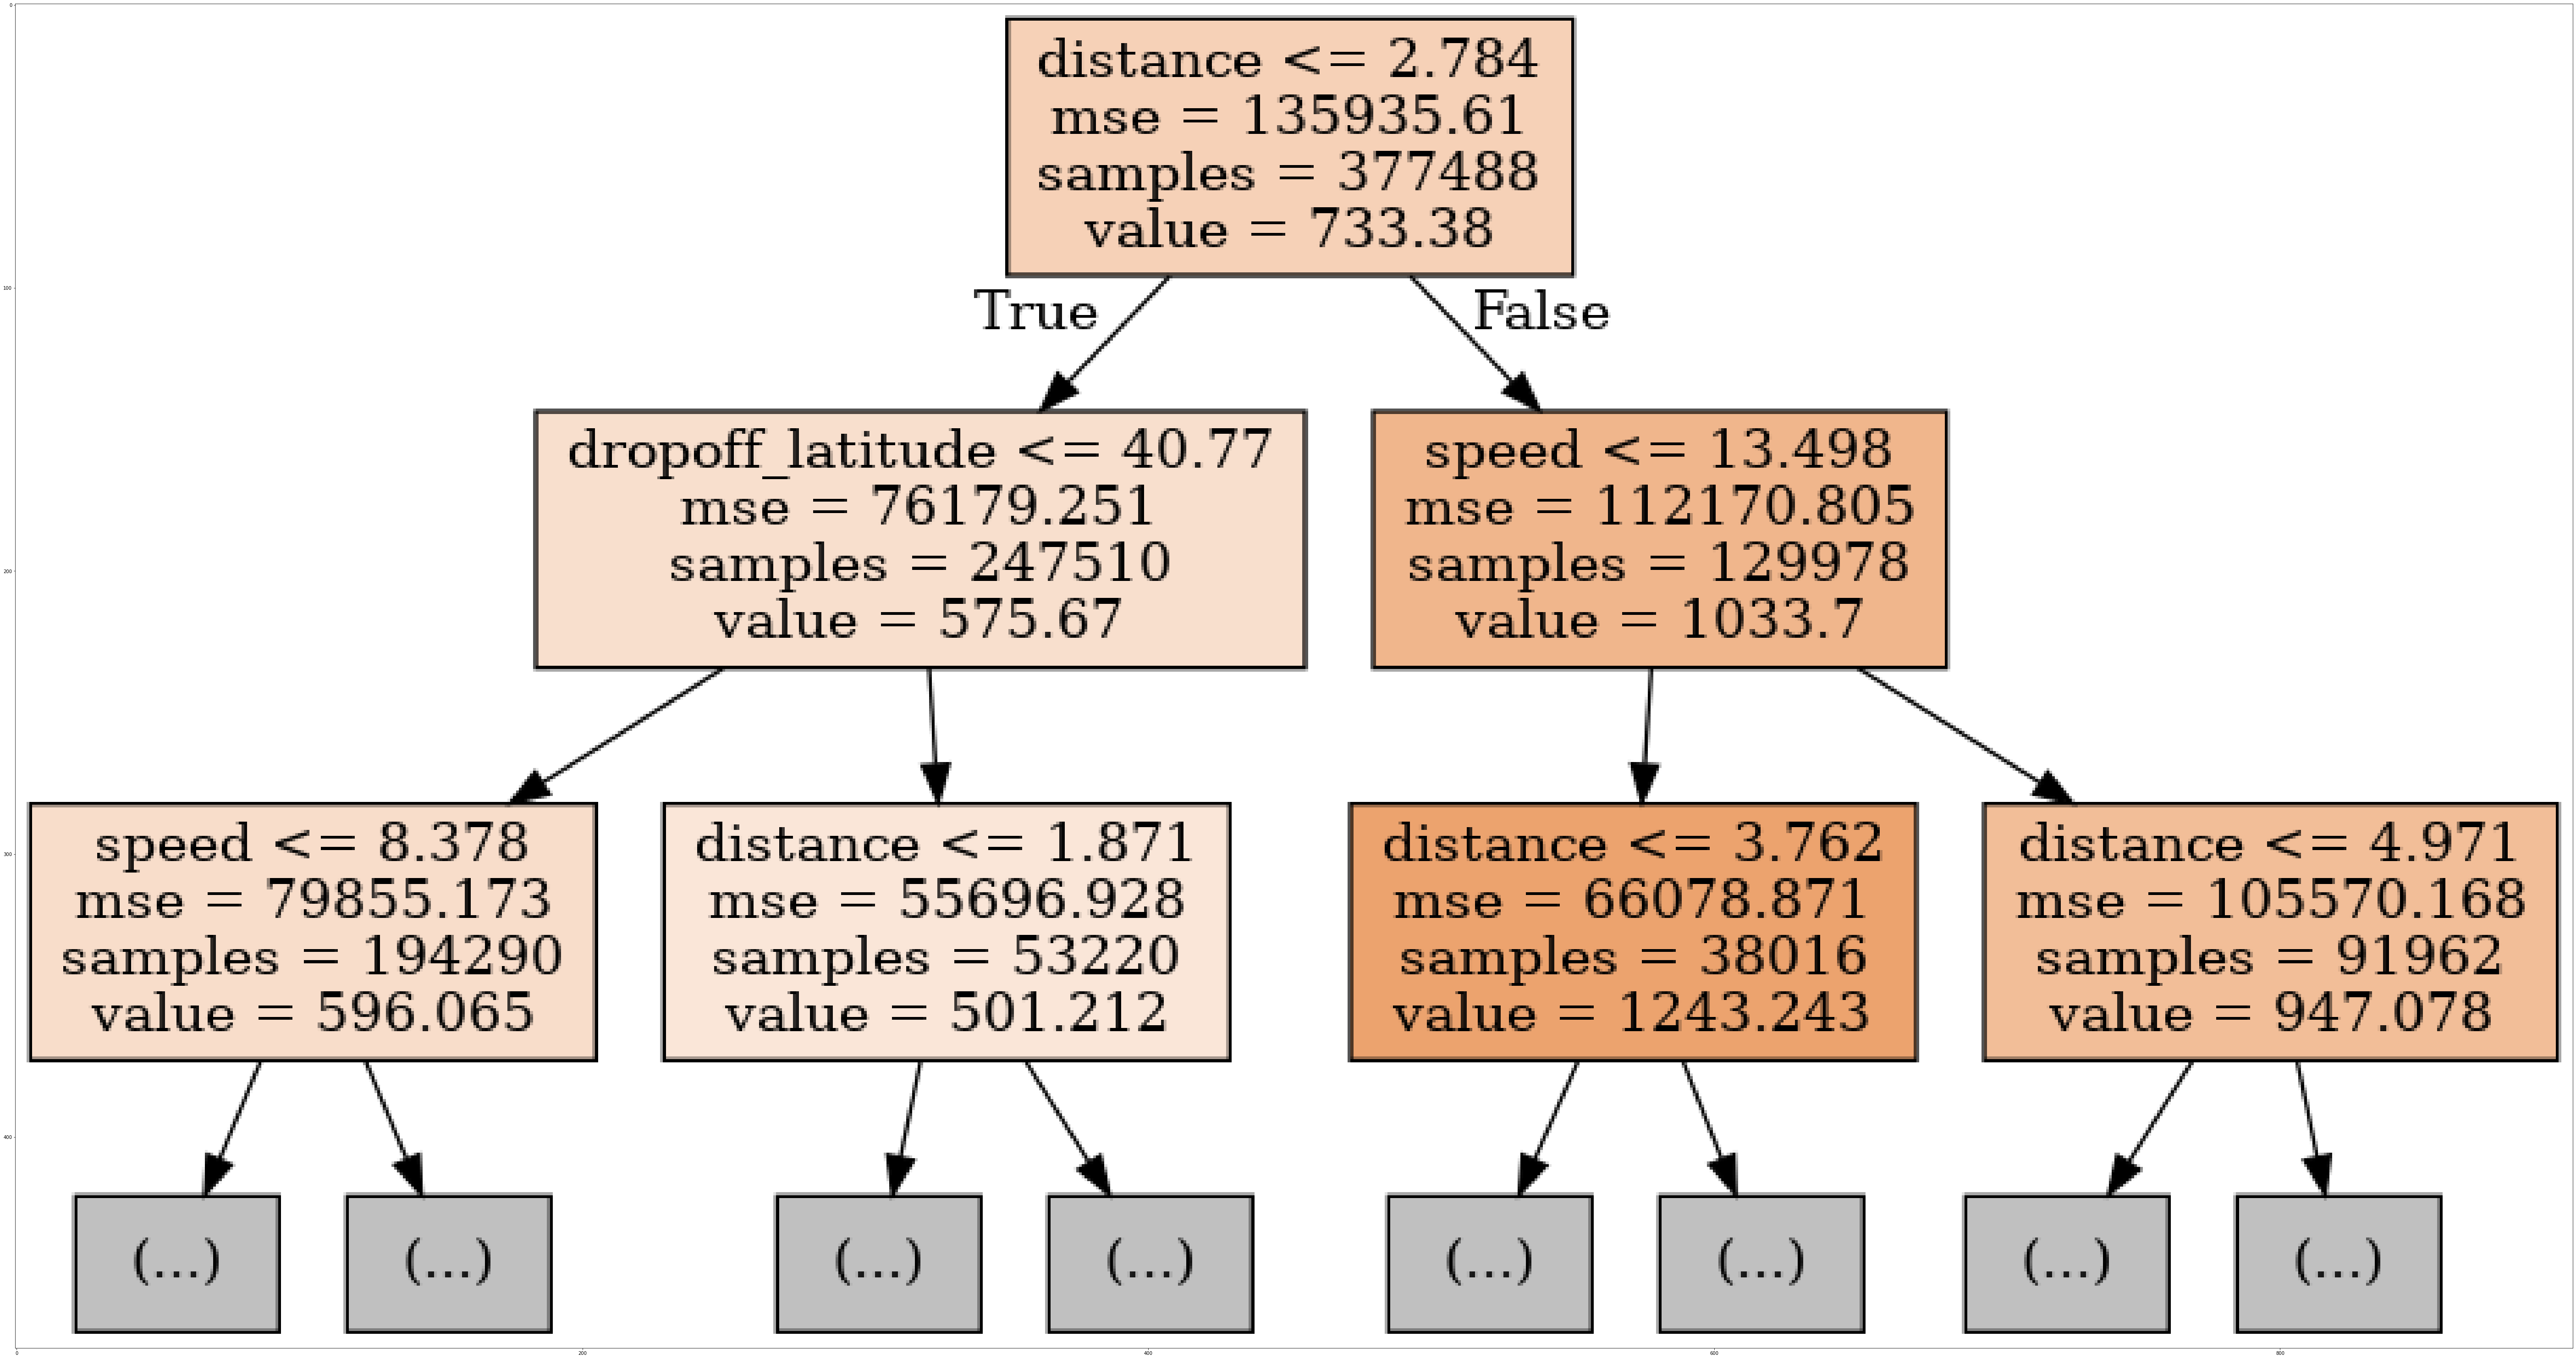

In [204]:
image = plt.imread('tree.png')
plt.figure(figsize=(100,100))
plt.imshow(image)

**A look at the decision tree shows that the variables speed and distance takes precedance denoting the accurate prediction is based on them**

### KNN MODEL

In [205]:
#seperating independent and dependent variables
x = data.drop(['trip_duration'], axis = 1)
y = data['trip_duration']

In [206]:
## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [207]:
#arranging the data back to a dataframe

In [208]:
X = pd.DataFrame(x_scaled, columns = x.columns)

In [209]:
#creating the train and test set

In [210]:
train_x, test_x, train_y, test_y = train_test_split(X,y, random_state = 56)

In [211]:
#importing KNN regressor and metric mae

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_absolute_error as mae

In [212]:
# Creating instance of KNN
reg = KNN(n_neighbors = 2)

# Fitting the model
reg.fit(train_x, train_y)

KNeighborsRegressor(n_neighbors=2)

In [213]:
# Predicting over the train set and calculating MAE
train_predict = reg.predict(train_x)
k1 = mae(train_predict, train_y)
Knn_train = 1-(k1/mean_error)
print('Train MAE score   ', Knn_train )

Train MAE score    0.8956190306697887


In [214]:
# Predicting over the Train Set and calculating MSE
test_predict = reg.predict(test_x)
k2 = mae(test_predict, test_y)
Knn_test = 1-(k2/mean_error)
print('Test MAE score   ', Knn_test )

Test MAE score    0.8121046899231037


**due to lack of computational capacity k= 2 is chose other values dont give output or freezes**

## COMPARISON OF MODELS

In [216]:
d = {'type':['train','test','train','test','train','test' ],
     'model': ['linear','linear','decision_tree','decision_tree','knn','knn'],
     'score': [Linear_train, Linear_test,decision_train,decision_test,Knn_train , Knn_test]
    }

df = pd.DataFrame(d)

<AxesSubplot:xlabel='model', ylabel='score'>

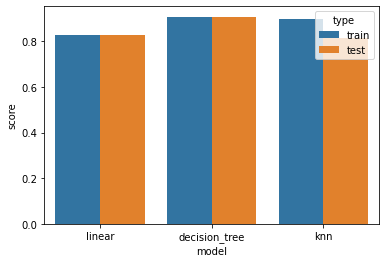

In [217]:
sns.barplot(data = df,x = 'model' ,y = 'score',hue = 'type',ci = None )

**from the graph it is evident that the decision tree is giving the best score and suitable for prediction of data**
